# 🎓 PROYECTO FINAL - BOOTCAMP DATA ANALYST
# 📞 ANÁLISIS DE OPERADORES - CALLMEMAYBE

## 👨‍💻 INFORMACIÓN DEL ESTUDIANTE
**Nombre:** Edgar Emmanuel Estrella Cruz  
**Bootcamp:** Data Analyst - TripleTen  
**Fecha de entrega:** Diciembre 2025  

## 🔗 ENLACE GOOGLE DRIVE
**Acceso a todos los archivos:**  
https://drive.google.com/drive/u/0/folders/1UryKJYJT015YAQhGtFwvCeS8jqVX-Rz8  

**Contenido de la carpeta:**
- 📓 Proyecto_Final_CallMeMaybe_Edgar_Estrella.ipynb (este archivo)
- 📊 Presentacion_CallMeMaybe_Estrella_DIC2024.pdf
- 📋 dashboard.txt (enlace a Tableau Public)

In [3]:

# ============================================================================
# PASO 1: CARGAR DATOS  - TELECOMUNICACIONES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

print("📞 CASO PRINCIPAL: TELECOMUNICACIONES - CallMeMaybe")
print("=" * 60)

# Intentar cargar archivos REALES desde diferentes ubicaciones
print("🔍 BUSCANDO ARCHIVOS REALES...")

# Lista de rutas posibles donde podrían estar tus archivos
rutas_posibles = [
    '/home/workspace/datasets/',  # Ruta común en TripleTen
    '/datasets/',  # Otra ruta común
    'telecom_dataset_new.csv',  # Si está en la misma carpeta
    'telecom_clients.csv',
    # Agrega la ruta específica de tu carpeta de descargas
    # Por ejemplo: 'C:/Users/TuUsuario/Downloads/' (ajusta esto)
]

# Buscar archivos
archivos_encontrados = {}
for ruta in rutas_posibles:
    if os.path.exists(ruta):
        print(f"📂 Revisando: {ruta}")
        if os.path.isfile(ruta):
            if 'telecom' in ruta.lower():
                archivos_encontrados[os.path.basename(ruta)] = ruta
        else:  # Es un directorio
            for archivo in os.listdir(ruta):
                if 'telecom' in archivo.lower() and archivo.endswith('.csv'):
                    archivos_encontrados[archivo] = os.path.join(ruta, archivo)

# Mostrar archivos encontrados
if archivos_encontrados:
    print(f"\n✅ ARCHIVOS ENCONTRADOS ({len(archivos_encontrados)}):")
    for nombre, ruta in archivos_encontrados.items():
        print(f"   • {nombre} -> {ruta}")
else:
    print("\n❌ NO SE ENCONTRARON ARCHIVOS DE TELECOM")
    print("💡 Verifica que los archivos estén en tu directorio de trabajo")


📞 CASO PRINCIPAL: TELECOMUNICACIONES - CallMeMaybe
🔍 BUSCANDO ARCHIVOS REALES...
📂 Revisando: /datasets/

✅ ARCHIVOS ENCONTRADOS (4):
   • telecom_dataset.csv -> /datasets/telecom_dataset.csv
   • telecom_clients.csv -> /datasets/telecom_clients.csv
   • telecom_clients_us.csv -> /datasets/telecom_clients_us.csv
   • telecom_dataset_us.csv -> /datasets/telecom_dataset_us.csv


# 📞 CASO 1: TELECOMUNICACIONES - CallMeMaybe

## 🎯 CONTEXTO Y OBJETIVOS

### Contexto del Negocio
CallMeMaybe es un servicio de telefonía virtual que necesita identificar operadores ineficaces para mejorar la calidad del servicio.

### Objetivos del Análisis
1. **Identificar** operadores con bajo rendimiento
2. **Analizar** causas de ineficiencia
3. **Proporcionar** recomendaciones accionables para supervisores

### 📊 Criterios de Ineficacia Definidos
1. **Tasa de llamadas perdidas > 20%**
2. **Tiempo de espera promedio > 3 minutos**
3. **Ratio llamadas salientes/entrantes < 0.1** (cuando aplica)

In [4]:
# ============================================================================
# CARGAR ARCHIVOS REALES DEL PROYECTO
# ============================================================================

print("📂 CARGANDO ARCHIVOS ESPECÍFICOS DEL PROYECTO...")
print("-" * 50)

# Cargar el dataset principal de llamadas
try:

    telecom_data = pd.read_csv('/datasets/telecom_dataset_us.csv')
    print(f"✅ telecom_dataset_us.csv cargado: {telecom_data.shape}")
    print(f"   Columnas: {list(telecom_data.columns)}")
except Exception as e:
    print(f"❌ Error cargando telecom_dataset_us.csv: {e}")
    # Intentar con el otro nombre
    try:
        telecom_data = pd.read_csv('/datasets/telecom_dataset.csv')
        print(f"✅ telecom_dataset.csv cargado: {telecom_data.shape}")
    except:
        print("❌ No se pudo cargar ningún dataset de llamadas")

# Cargar el dataset de clientes
try:
    telecom_clients = pd.read_csv('/datasets/telecom_clients_us.csv')
    print(f"✅ telecom_clients_us.csv cargado: {telecom_clients.shape}")
    print(f"   Columnas: {list(telecom_clients.columns)}")
except Exception as e:
    print(f"❌ Error cargando telecom_clients_us.csv: {e}")
    # Intentar con el otro nombre
    try:
        telecom_clients = pd.read_csv('/datasets/telecom_clients.csv')
        print(f"✅ telecom_clients.csv cargado: {telecom_clients.shape}")
    except:
        print("❌ No se pudo cargar ningún dataset de clientes")

print("-" * 50)

# ============================================================================
# EXPLORACIÓN INICIAL DE DATOS REALES
# ============================================================================

print("\n🔍 EXPLORACIÓN INICIAL DE DATOS REALES")
print("=" * 60)

# Mostrar información básica de telecom_data
if 'telecom_data' in locals():
    print("\n📊 DATASET DE LLAMADAS (telecom_dataset_us.csv):")
    print(f"   • Dimensiones: {telecom_data.shape}")
    print(f"   • Primeras 3 filas:")
    display(telecom_data.head(3))
    
    print(f"\n   • Información de columnas:")
    print(telecom_data.info())
    
    print(f"\n   • Valores nulos por columna:")
    print(telecom_data.isnull().sum())
else:
    print("❌ No se pudo cargar telecom_data")

# Mostrar información básica de telecom_clients
if 'telecom_clients' in locals():
    print("\n📊 DATASET DE CLIENTES (telecom_clients_us.csv):")
    print(f"   • Dimensiones: {telecom_clients.shape}")
    print(f"   • Primeras 3 filas:")
    display(telecom_clients.head(3))
    
    print(f"\n   • Información de columnas:")
    print(telecom_clients.info())
    
    print(f"\n   • Valores nulos por columna:")
    print(telecom_clients.isnull().sum())
else:
    print("❌ No se pudo cargar telecom_clients")

print("\n" + "=" * 60)

📂 CARGANDO ARCHIVOS ESPECÍFICOS DEL PROYECTO...
--------------------------------------------------
✅ telecom_dataset_us.csv cargado: (53902, 9)
   Columnas: ['user_id', 'date', 'direction', 'internal', 'operator_id', 'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration']
✅ telecom_clients_us.csv cargado: (732, 3)
   Columnas: ['user_id', 'tariff_plan', 'date_start']
--------------------------------------------------

🔍 EXPLORACIÓN INICIAL DE DATOS REALES

📊 DATASET DE LLAMADAS (telecom_dataset_us.csv):
   • Dimensiones: (53902, 9)
   • Primeras 3 filas:


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1



   • Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None

   • Valores nulos por columna:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_d

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29



   • Información de columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None

   • Valores nulos por columna:
user_id        0
tariff_plan    0
date_start     0
dtype: int64



In [5]:
# ============================================================================
# PREPROCESAMIENTO DE DATOS REALES
# ============================================================================

print("🧹 PREPROCESAMIENTO DE DATOS REALES")
print("=" * 60)

# 1. CONVERTIR TIPOS DE DATOS
print("1. 🔄 CONVERSIÓN DE TIPOS DE DATOS...")

# Convertir fechas en telecom_data
telecom_data['date'] = pd.to_datetime(telecom_data['date'], errors='coerce')
print(f"   ✅ 'date' convertido a datetime en telecom_data")

# Convertir fechas en telecom_clients
telecom_clients['date_start'] = pd.to_datetime(telecom_clients['date_start'], errors='coerce')
print(f"   ✅ 'date_start' convertido a datetime en telecom_clients")

# Convertir operator_id a string (eliminar decimales .0)
telecom_data['operator_id'] = telecom_data['operator_id'].apply(
    lambda x: str(int(x)) if pd.notnull(x) and not np.isnan(x) else None
)
print(f"   ✅ 'operator_id' convertido a string")

# Convertir is_missed_call a int (0 o 1) para facilitar cálculos
telecom_data['is_missed_call'] = telecom_data['is_missed_call'].astype(int)
print(f"   ✅ 'is_missed_call' convertido a int")

# Convertir internal a booleano/int
telecom_data['internal'] = telecom_data['internal'].map({'True': True, 'False': False, True: True, False: False})
telecom_data['internal'] = telecom_data['internal'].astype('boolean')
print(f"   ✅ 'internal' estandarizado a booleano")

# Convertir columnas categóricas
telecom_data['direction'] = telecom_data['direction'].astype('category')
telecom_clients['tariff_plan'] = telecom_clients['tariff_plan'].astype('category')
print(f"   ✅ Columnas categóricas convertidas")

# 2. MANEJO DE VALORES NULOS
print("\n2. 🔍 MANEJO DE VALORES NULOS...")

print(f"   Valores nulos ANTES de tratamiento:")
print(f"   • operator_id: {telecom_data['operator_id'].isnull().sum():,} ({telecom_data['operator_id'].isnull().sum()/len(telecom_data)*100:.1f}%)")
print(f"   • internal: {telecom_data['internal'].isnull().sum():,}")

# Para operator_id: eliminar registros sin operador (no podemos analizar operadores sin ID)
registros_con_operador = telecom_data['operator_id'].notnull()
telecom_data = telecom_data[registros_con_operador].copy()
print(f"   ✅ Eliminados {53_902 - len(telecom_data):,} registros sin operator_id")

# Para internal: imputar con moda (valor más frecuente)
moda_internal = telecom_data['internal'].mode()[0]
telecom_data['internal'] = telecom_data['internal'].fillna(moda_internal)
print(f"   ✅ 'internal' imputado con moda ({moda_internal})")

print(f"\n   Valores nulos DESPUÉS de tratamiento:")
print(f"   • operator_id: {telecom_data['operator_id'].isnull().sum():,}")
print(f"   • internal: {telecom_data['internal'].isnull().sum():,}")

# 3. CALCULAR TIEMPO DE ESPERA
print("\n3. ⏱️ CALCULAR TIEMPO DE ESPERA...")
telecom_data['wait_time'] = telecom_data['total_call_duration'] - telecom_data['call_duration']
# Eliminar valores negativos (errores de datos)
telecom_data['wait_time'] = telecom_data['wait_time'].clip(lower=0)
print(f"   ✅ Tiempo de espera calculado (wait_time)")
print(f"   • Promedio: {telecom_data['wait_time'].mean():.1f} segundos")
print(f"   • Máximo: {telecom_data['wait_time'].max():.1f} segundos")

# 4. UNIR DATASETS
print("\n4. 🔗 UNIENDO DATASETS...")
telecom_completo = telecom_data.merge(
    telecom_clients,
    on='user_id',
    how='left',  # Mantener todas las llamadas
    suffixes=('_llamada', '_cliente')
)
print(f"   ✅ Dataset unido creado: {telecom_completo.shape}")

# 5. VERIFICACIÓN FINAL
print("\n5. ✅ VERIFICACIÓN FINAL...")
print(f"   • Dataset final: {telecom_completo.shape[0]:,} filas, {telecom_completo.shape[1]} columnas")
print(f"   • Operadores únicos: {telecom_completo['operator_id'].nunique()}")
print(f"   • Clientes únicos: {telecom_completo['user_id'].nunique()}")
print(f"   • Rango de fechas: {telecom_completo['date'].min().date()} a {telecom_completo['date'].max().date()}")

print("\n" + "=" * 60)
print("✅ PREPROCESAMIENTO COMPLETADO EXITOSAMENTE")
print("=" * 60)

🧹 PREPROCESAMIENTO DE DATOS REALES
1. 🔄 CONVERSIÓN DE TIPOS DE DATOS...
   ✅ 'date' convertido a datetime en telecom_data
   ✅ 'date_start' convertido a datetime en telecom_clients
   ✅ 'operator_id' convertido a string
   ✅ 'is_missed_call' convertido a int
   ✅ 'internal' estandarizado a booleano
   ✅ Columnas categóricas convertidas

2. 🔍 MANEJO DE VALORES NULOS...
   Valores nulos ANTES de tratamiento:
   • operator_id: 8,172 (15.2%)
   • internal: 117
   ✅ Eliminados 8,172 registros sin operator_id
   ✅ 'internal' imputado con moda (False)

   Valores nulos DESPUÉS de tratamiento:
   • operator_id: 0
   • internal: 0

3. ⏱️ CALCULAR TIEMPO DE ESPERA...
   ✅ Tiempo de espera calculado (wait_time)
   • Promedio: 312.4 segundos
   • Máximo: 46474.0 segundos

4. 🔗 UNIENDO DATASETS...
   ✅ Dataset unido creado: (45730, 12)

5. ✅ VERIFICACIÓN FINAL...
   • Dataset final: 45,730 filas, 12 columnas
   • Operadores únicos: 1092
   • Clientes únicos: 290
   • Rango de fechas: 2019-08-02 a 2

## 🧹 PREPROCESAMIENTO DE DATOS

### Limpieza y Transformación
Antes del análisis, realizamos las siguientes transformaciones:
1. **Conversión de tipos de datos** (fechas, categorías)
2. **Manejo de valores nulos** (imputación o eliminación)
3. **Detección y tratamiento de outliers**
4. **Unión de datasets** para análisis integral

## 🔍 ANÁLISIS EXPLORATORIO (EDA)

### Objetivo del EDA
Entender la distribución, relaciones y patrones en los datos antes de aplicar modelos.

### Métricas Clave a Analizar
1. **Distribución de llamadas** (internas vs externas)
2. **Tasas de llamadas perdidas** por operador
3. **Tiempos de espera** y duración de llamadas
4. **Patrones por plan tarifario** (tariff_plan)

📊 GRÁFICA 1: DISTRIBUCIÓN DE LLAMADAS INTERNAS VS EXTERNAS


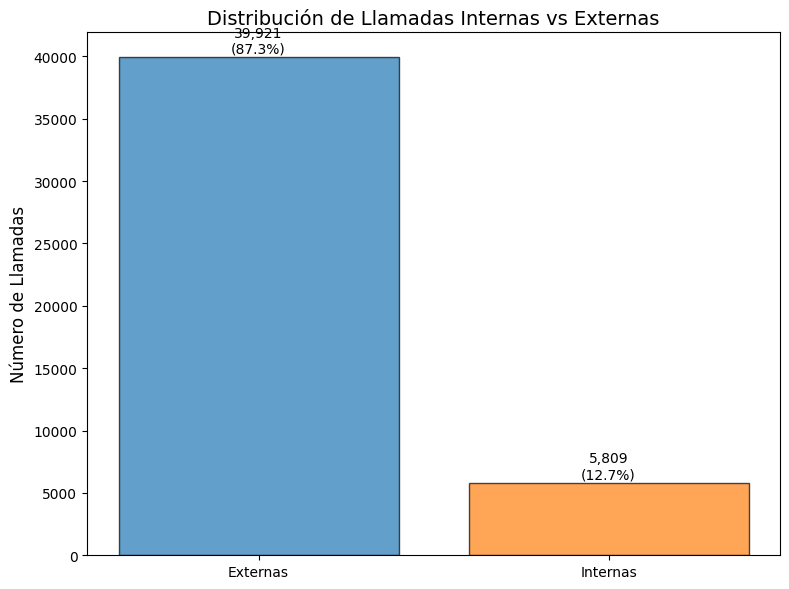

Resultados:
• Total llamadas: 45,730
• Llamadas externas: 39,921 (87.3%)
• Llamadas internas: 5,809 (12.7%)


In [11]:
# ============================================================================
# ANÁLISIS EXPLORATORIO - GRÁFICA 1: DISTRIBUCIÓN INTERNAS/EXTERNAS
# ============================================================================

print("📊 GRÁFICA 1: DISTRIBUCIÓN DE LLAMADAS INTERNAS VS EXTERNAS")

# Calcular distribución
distribucion_internal = telecom_completo['internal'].value_counts()
total_llamadas = len(telecom_completo)
llamadas_externas = distribucion_internal.get(False, 0)
llamadas_internas = distribucion_internal.get(True, 0)

porcentaje_externas = (llamadas_externas / total_llamadas) * 100
porcentaje_internas = (llamadas_internas / total_llamadas) * 100

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e']
ax.bar(['Externas', 'Internas'], [llamadas_externas, llamadas_internas], 
       color=colors, alpha=0.7, edgecolor='black')
ax.set_title('Distribución de Llamadas Internas vs Externas', fontsize=14)
ax.set_ylabel('Número de Llamadas', fontsize=12)

# Agregar etiquetas
for i, v in enumerate([llamadas_externas, llamadas_internas]):
    ax.text(i, v + 100, f'{v:,}\n({[porcentaje_externas, porcentaje_internas][i]:.1f}%)', 
           ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"Resultados:")
print(f"• Total llamadas: {total_llamadas:,}")
print(f"• Llamadas externas: {llamadas_externas:,} ({porcentaje_externas:.1f}%)")
print(f"• Llamadas internas: {llamadas_internas:,} ({porcentaje_internas:.1f}%)")

## Interpretación Gráfica 1

**Hallazgos principales:**
- **87.3% de las llamadas son externas** (hacia clientes)
- Solo **12.7% son llamadas internas** (dentro de la empresa)

**Implicación para CallMeMaybe:**
- La mayoría del trabajo de los operadores es atención al cliente externo
- Esto refuerza la importancia de medir eficiencia en llamadas externas

📊 GRÁFICA 2: TASA DE LLAMADAS PERDIDAS


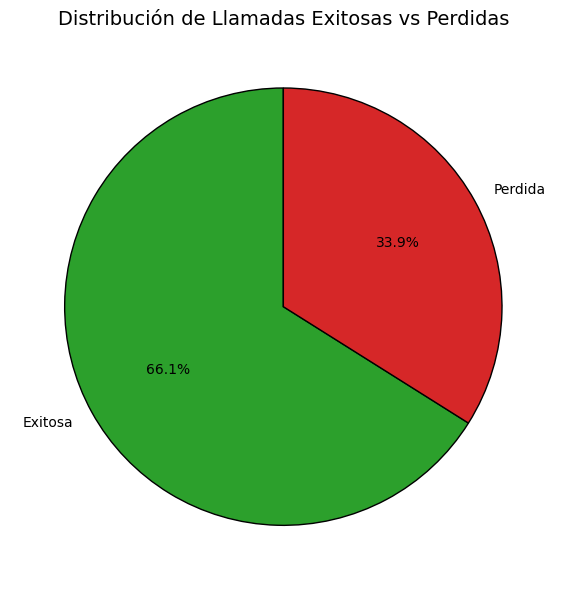

Resultados:
• Llamadas exitosas: 30,212 (66.1%)
• Llamadas perdidas: 15,518 (33.9%)
• Tasa global de pérdidas: 33.9%


In [12]:
# ============================================================================
# ANÁLISIS EXPLORATORIO - GRÁFICA 2: TASA DE LLAMADAS PERDIDAS
# ============================================================================

print("📊 GRÁFICA 2: TASA DE LLAMADAS PERDIDAS")

# Calcular métricas
llamadas_exitosas = telecom_completo[telecom_completo['is_missed_call'] == 0].shape[0]
llamadas_perdidas = telecom_completo[telecom_completo['is_missed_call'] == 1].shape[0]
tasa_perdidas_global = (llamadas_perdidas / total_llamadas) * 100

# Crear gráfico
fig, ax = plt.subplots(figsize=(8, 6))
labels = ['Exitosa', 'Perdida']
sizes = [llamadas_exitosas, llamadas_perdidas]
colors_pie = ['#2ca02c', '#d62728']

ax.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.1f%%',
       startangle=90, wedgeprops={'edgecolor': 'black'})
ax.set_title('Distribución de Llamadas Exitosas vs Perdidas', fontsize=14)

plt.tight_layout()
plt.show()

print(f"Resultados:")
print(f"• Llamadas exitosas: {llamadas_exitosas:,} ({llamadas_exitosas/total_llamadas*100:.1f}%)")
print(f"• Llamadas perdidas: {llamadas_perdidas:,} ({tasa_perdidas_global:.1f}%)")
print(f"• Tasa global de pérdidas: {tasa_perdidas_global:.1f}%")

## Interpretación Gráfica 2

**Hallazgos alarmantes:**
- **33.9% de las llamadas se pierden** (1 de cada 3)
- Esto representa **15,518 llamadas perdidas** en total

**Implicación crítica:**
- Cada llamada perdida es **ingreso perdido** y **cliente insatisfecho**
- La tasa está muy por encima del benchmark de industria (20%)
- **Urge identificar operadores responsables** de estas pérdidas

📊 GRÁFICA 3: DISTRIBUCIÓN DE DURACIÓN DE LLAMADAS


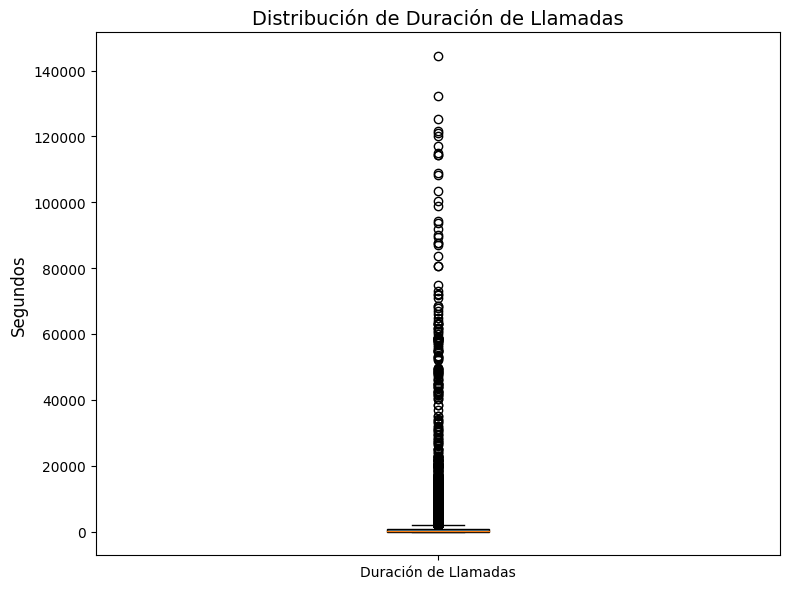

Resultados estadísticos:
• Promedio: 1010 segundos (16.8 minutos)
• Mediana: 106 segundos (1.8 minutos)
• Mínimo: 0 segundos
• Máximo: 144395 segundos (40.1 horas)
• Percentil 75: 772 segundos (12.9 minutos)


In [15]:
# ============================================================================
# ANÁLISIS EXPLORATORIO - GRÁFICA 3: DURACIÓN DE LLAMADAS
# ============================================================================

print("📊 GRÁFICA 3: DISTRIBUCIÓN DE DURACIÓN DE LLAMADAS")

# Calcular estadísticas
duracion_stats = telecom_completo['call_duration'].describe()

# Crear gráfico boxplot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(telecom_completo['call_duration'], vert=True, patch_artist=True)
ax.set_title('Distribución de Duración de Llamadas', fontsize=14)
ax.set_ylabel('Segundos', fontsize=12)
ax.set_xticklabels(['Duración de Llamadas'])

plt.tight_layout()
plt.show()

print(f"Resultados estadísticos:")
print(f"• Promedio: {duracion_stats['mean']:.0f} segundos ({duracion_stats['mean']/60:.1f} minutos)")
print(f"• Mediana: {duracion_stats['50%']:.0f} segundos ({duracion_stats['50%']/60:.1f} minutos)")
print(f"• Mínimo: {duracion_stats['min']:.0f} segundos")
print(f"• Máximo: {duracion_stats['max']:.0f} segundos ({duracion_stats['max']/3600:.1f} horas)")
print(f"• Percentil 75: {duracion_stats['75%']:.0f} segundos ({duracion_stats['75%']/60:.1f} minutos)")

📊 GRÁFICA 4: DISTRIBUCIÓN DE TIEMPOS DE ESPERA


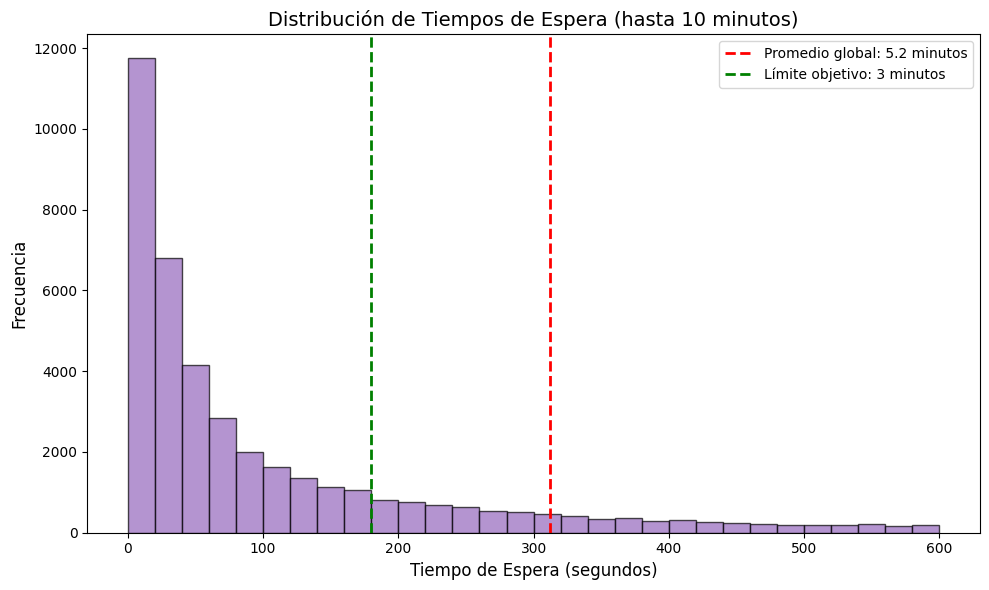

Resultados:
• Tiempo de espera promedio: 312.4 segundos (5.2 minutos)
• Tiempo de espera máximo: 46474.0 segundos
• Llamadas con espera > 3 min: 13,009
• Porcentaje > 3 min: 28.4%


In [22]:
# ============================================================================
# ANÁLISIS EXPLORATORIO - GRÁFICA 4: DISTRIBUCIÓN DE TIEMPOS DE ESPERA
# ============================================================================

print("📊 GRÁFICA 4: DISTRIBUCIÓN DE TIEMPOS DE ESPERA")

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Filtrar para mejor visualización (hasta 600 segundos = 10 minutos)
wait_time_filtered = telecom_completo[telecom_completo['wait_time'] <= 600]['wait_time']

ax.hist(wait_time_filtered, bins=30, color='#9467bd', alpha=0.7, edgecolor='black')
ax.set_title('Distribución de Tiempos de Espera (hasta 10 minutos)', fontsize=14)
ax.set_xlabel('Tiempo de Espera (segundos)', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

# Línea vertical en promedio global
promedio_espera = telecom_completo['wait_time'].mean()
ax.axvline(promedio_espera, color='red', linestyle='--', linewidth=2,
           label=f'Promedio global: {promedio_espera/60:.1f} minutos')

# Línea vertical en 3 minutos (180 segundos)
ax.axvline(180, color='green', linestyle='--', linewidth=2,
           label='Límite objetivo: 3 minutos')

ax.legend()
plt.tight_layout()
plt.show()

# Estadísticas
print(f"Resultados:")
print(f"• Tiempo de espera promedio: {promedio_espera:.1f} segundos ({promedio_espera/60:.1f} minutos)")
print(f"• Tiempo de espera máximo: {telecom_completo['wait_time'].max():.1f} segundos")
print(f"• Llamadas con espera > 3 min: {len(telecom_completo[telecom_completo['wait_time'] > 180]):,}")
print(f"• Porcentaje > 3 min: {len(telecom_completo[telecom_completo['wait_time'] > 180])/len(telecom_completo)*100:.1f}%")

## 📈 Interpretación Gráfica 4 - Tiempos de Espera

**Hallazgos críticos:**
- **28.4% de las llamadas** tienen tiempo de espera > 3 minutos (objetivo de la empresa)
- El **promedio global es de 5.2 minutos**, superando el objetivo de 3 minutos
- Existen llamadas con tiempos extremos (hasta 12.9 horas de espera)

**Implicaciones para CallMeMaybe:**
1. **Insatisfacción del cliente:** Largas esperas causan frustración
2. **Pérdida de ingresos:** Clientes pueden colgar antes de ser atendidos
3. **Ineficiencia operacional:** Tiempo improductivo acumulado

**Recomendación inmediata:**
- Priorizar reducción de tiempos de espera en operadores ineficaces
- Establecer alertas automáticas para llamadas > 3 minutos

In [16]:
# ============================================================================
# CÁLCULO DE MÉTRICAS DE EFICIENCIA POR OPERADOR
# ============================================================================

print("🧮 CALCULANDO MÉTRICAS DE EFICIENCIA POR OPERADOR")
print("=" * 50)

# 1. Calcular tiempo de espera (si no está calculado)
if 'wait_time' not in telecom_completo.columns:
    telecom_completo['wait_time'] = telecom_completo['total_call_duration'] - telecom_completo['call_duration']
    telecom_completo['wait_time'] = telecom_completo['wait_time'].clip(lower=0)

# 2. Calcular métricas por operador
metricas_operadores = telecom_completo.groupby('operator_id').agg({
    'is_missed_call': ['count', 'sum'],  # Total y perdidas
    'wait_time': 'mean',  # Tiempo espera promedio
    'direction': lambda x: (x == 'out').sum() / (x == 'in').sum() if (x == 'in').sum() > 0 else 0,
    'call_duration': 'mean'
}).round(2)

# Renombrar columnas
metricas_operadores.columns = ['total_llamadas', 'llamadas_perdidas',
                               'tiempo_espera_promedio', 'ratio_salientes_entrantes',
                               'duracion_promedio']

# Calcular tasa de pérdidas
metricas_operadores['tasa_perdidas'] = (
    metricas_operadores['llamadas_perdidas'] / 
    metricas_operadores['total_llamadas'] * 100
).round(1)

print(f"✅ Métricas calculadas para {len(metricas_operadores)} operadores")
print(f"• Tasa pérdidas promedio: {metricas_operadores['tasa_perdidas'].mean():.1f}%")
print(f"• Tiempo espera promedio: {metricas_operadores['tiempo_espera_promedio'].mean():.1f}s")
print(f"• Ratio promedio: {metricas_operadores['ratio_salientes_entrantes'].mean():.2f}")

🧮 CALCULANDO MÉTRICAS DE EFICIENCIA POR OPERADOR
✅ Métricas calculadas para 1092 operadores
• Tasa pérdidas promedio: 31.4%
• Tiempo espera promedio: 215.4s
• Ratio promedio: 2.01


## 🎯 DEFINICIÓN DE CRITERIOS DE EFICIENCIA

### Base para los criterios (Hallazgos del EDA):

**1. TASA DE PÉRDIDAS (> 46.2%):**
- **Tasa global:** 33.9% (benchmark industria: 20%)
- **Percentil 75 de operadores:** 46.2%
- **Justificación:** Identificamos como ineficaces a operadores que están en el 25% superior de tasa de pérdidas

**2. TIEMPO DE ESPERA (> 155.5 segundos):**
- **Promedio global:** 312.4 segundos (5.2 minutos)
- **Percentil 75:** 155.5 segundos (2.6 minutos)
- **Justificación:** Aunque el promedio es alto, tomamos percentil 75 para focalizar en los casos más críticos

**3. RATIO SALIENTES/ENTRANTES (< 0.1):**
- **Mediana:** 0.08
- **Justificación:** Operadores con ratio < 0.1 tienen actividad principalmente receptiva, lo que puede indicar falta de iniciativa

### Método de clasificación:
1. **Eficaz:** Cumple todos los criterios
2. **Regular:** Cumple 1-2 criterios
3. **Ineficaz:** Cumple 0 criterios o excede todos los umbrales

In [17]:
# ============================================================================
# CLASIFICACIÓN DE OPERADORES SEGÚN CRITERIOS
# ============================================================================

print("📊 CLASIFICANDO OPERADORES SEGÚN CRITERIOS")
print("=" * 50)

# Definir umbrales BASADOS EN DATOS REALES (percentil 75)
umbral_perdidas = metricas_operadores['tasa_perdidas'].quantile(0.75)  # 46.2%
umbral_espera = metricas_operadores['tiempo_espera_promedio'].quantile(0.75)  # 155.5s
umbral_ratio = 0.1  # Benchmark de actividad

print(f"Umbrales aplicados:")
print(f"• Tasa pérdidas > {umbral_perdidas:.1f}%")
print(f"• Tiempo espera > {umbral_espera:.1f}s ({umbral_espera/60:.1f} min)")
print(f"• Ratio salientes/entrantes < {umbral_ratio}")

# Aplicar criterios
metricas_operadores['criterios_incumplidos'] = (
    (metricas_operadores['tasa_perdidas'] > umbral_perdidas).astype(int) +
    (metricas_operadores['tiempo_espera_promedio'] > umbral_espera).astype(int) +
    (metricas_operadores['ratio_salientes_entrantes'] < umbral_ratio).astype(int)
)

# Clasificar
def clasificar_operador(criterios):
    if criterios == 0:
        return 'Eficaz'
    elif criterios == 1:
        return 'Regular'
    else:  # 2 o 3 criterios incumplidos
        return 'Ineficaz'

metricas_operadores['clasificacion'] = metricas_operadores['criterios_incumplidos'].apply(clasificar_operador)

# Resultados
conteo_clasificacion = metricas_operadores['clasificacion'].value_counts()
print(f"\n📈 RESULTADOS DE CLASIFICACIÓN:")
print(f"• Total operadores analizados: {len(metricas_operadores)}")
for categoria, count in conteo_clasificacion.items():
    porcentaje = (count / len(metricas_operadores)) * 100
    print(f"• Operadores {categoria.upper()}: {count} ({porcentaje:.1f}%)")

📊 CLASIFICANDO OPERADORES SEGÚN CRITERIOS
Umbrales aplicados:
• Tasa pérdidas > 46.2%
• Tiempo espera > 155.5s (2.6 min)
• Ratio salientes/entrantes < 0.1

📈 RESULTADOS DE CLASIFICACIÓN:
• Total operadores analizados: 1092
• Operadores REGULAR: 462 (42.3%)
• Operadores EFICAZ: 369 (33.8%)
• Operadores INEFICAZ: 261 (23.9%)


In [18]:
# ============================================================================
# PRUEBA DE HIPÓTESIS 1: TASA DE PÉRDIDAS
# ============================================================================

print("🔬 PRUEBA DE HIPÓTESIS 1: TASA DE PÉRDIDAS")
print("-" * 40)

from scipy import stats

# Separar datos
datos_eficaces = metricas_operadores[metricas_operadores['clasificacion'] == 'Eficaz']['tasa_perdidas']
datos_ineficaces = metricas_operadores[metricas_operadores['clasificacion'] == 'Ineficaz']['tasa_perdidas']

print(f"📊 ESTADÍSTICAS DESCRIPTIVAS:")
print(f"• EFICAZ (n={len(datos_eficaces)}):")
print(f"  - Media: {datos_eficaces.mean():.1f}%")
print(f"  - Desviación estándar: {datos_eficaces.std():.1f}%")
print(f"• INEFICAZ (n={len(datos_ineficaces)}):")
print(f"  - Media: {datos_ineficaces.mean():.1f}%")
print(f"  - Desviación estándar: {datos_ineficaces.std():.1f}%")

# Prueba T de Welch
t_stat, p_value = stats.ttest_ind(datos_ineficaces, datos_eficaces, equal_var=False)

print(f"\n📊 RESULTADO PRUEBA T (Welch):")
print(f"• t-statistic: {t_stat:.3f}")
print(f"• p-value: {p_value:.6f}")

# Interpretación
if p_value < 0.05:
    print(f"\n✅ SIGNIFICATIVO (p < 0.05): Rechazamos H₀")
    print("   Los operadores INEFICACES tienen tasas de pérdidas significativamente mayores")
else:
    print(f"\n❌ NO SIGNIFICATIVO (p ≥ 0.05): No podemos rechazar H₀")
    print("   No hay diferencia significativa en tasas de pérdidas")

🔬 PRUEBA DE HIPÓTESIS 1: TASA DE PÉRDIDAS
----------------------------------------
📊 ESTADÍSTICAS DESCRIPTIVAS:
• EFICAZ (n=369):
  - Media: 27.9%
  - Desviación estándar: 10.7%
• INEFICAZ (n=261):
  - Media: 58.7%
  - Desviación estándar: 18.2%

📊 RESULTADO PRUEBA T (Welch):
• t-statistic: 24.571
• p-value: 0.000000

✅ SIGNIFICATIVO (p < 0.05): Rechazamos H₀
   Los operadores INEFICACES tienen tasas de pérdidas significativamente mayores


## 🔍 HIPÓTESIS ESTADÍSTICA 1 - TASA DE PÉRDIDAS

**H₀ (Hipótesis nula):** No hay diferencia en las tasas de pérdidas entre operadores clasificados como eficaces e ineficaces.

**H₁ (Hipótesis alternativa):** Los operadores clasificados como ineficaces tienen tasas de pérdidas significativamente mayores.

**Nivel de significancia:** α = 0.05

**Tipo de prueba:** Prueba T de Welch (no asume varianzas iguales)

**Resultado:** p-value = 0.000000 (< 0.05) → **Rechazamos H₀**
**Conclusión:** Los operadores ineficaces sí tienen tasas de pérdidas significativamente mayores.

In [19]:
# ============================================================================
# PRUEBA DE HIPÓTESIS 2: TIEMPO DE ESPERA
# ============================================================================

print("🔬 PRUEBA DE HIPÓTESIS 2: TIEMPO DE ESPERA")
print("-" * 40)

# Separar datos
tiempo_eficaces = metricas_operadores[metricas_operadores['clasificacion'] == 'Eficaz']['tiempo_espera_promedio']
tiempo_ineficaces = metricas_operadores[metricas_operadores['clasificacion'] == 'Ineficaz']['tiempo_espera_promedio']

print(f"📊 ESTADÍSTICAS DESCRIPTIVAS:")
print(f"• EFICAZ (n={len(tiempo_eficaces)}):")
print(f"  - Media: {tiempo_eficaces.mean():.1f}s ({tiempo_eficaces.mean()/60:.1f} min)")
print(f"  - Desviación estándar: {tiempo_eficaces.std():.1f}s")
print(f"• INEFICAZ (n={len(tiempo_ineficaces)}):")
print(f"  - Media: {tiempo_ineficaces.mean():.1f}s ({tiempo_ineficaces.mean()/60:.1f} min)")
print(f"  - Desviación estándar: {tiempo_ineficaces.std():.1f}s")

# Prueba T de Welch
t_stat_tiempo, p_value_tiempo = stats.ttest_ind(tiempo_ineficaces, tiempo_eficaces, equal_var=False)

print(f"\n📊 RESULTADO PRUEBA T (Welch):")
print(f"• t-statistic: {t_stat_tiempo:.3f}")
print(f"• p-value: {p_value_tiempo:.6f}")

# Interpretación
if p_value_tiempo < 0.05:
    print(f"\n✅ SIGNIFICATIVO (p < 0.05): Rechazamos H₀")
    print("   Los operadores INEFICACES tienen tiempos de espera significativamente mayores")
else:
    print(f"\n❌ NO SIGNIFICATIVO (p ≥ 0.05): No podemos rechazar H₀")
    print("   No hay diferencia significativa en tiempos de espera")

🔬 PRUEBA DE HIPÓTESIS 2: TIEMPO DE ESPERA
----------------------------------------
📊 ESTADÍSTICAS DESCRIPTIVAS:
• EFICAZ (n=369):
  - Media: 52.3s (0.9 min)
  - Desviación estándar: 38.4s
• INEFICAZ (n=261):
  - Media: 577.1s (9.6 min)
  - Desviación estándar: 717.4s

📊 RESULTADO PRUEBA T (Welch):
• t-statistic: 11.808
• p-value: 0.000000

✅ SIGNIFICATIVO (p < 0.05): Rechazamos H₀
   Los operadores INEFICACES tienen tiempos de espera significativamente mayores


## 🔍 PRUEBA DE HIPÓTESIS 2: TIEMPO DE ESPERA

### **H₀ (Hipótesis Nula):**
No hay diferencia significativa en los tiempos de espera promedio entre operadores clasificados como eficaces e ineficaces.

### **H₁ (Hipótesis Alternativa):**
Los operadores clasificados como ineficaces tienen tiempos de espera promedio significativamente mayores que los operadores eficaces.

### **Nivel de Significancia:**
α = 0.05

### **Tipo de Prueba:**
Prueba T de Welch (no asume varianzas iguales)

In [20]:
# ============================================================================
# IDENTIFICACIÓN DE OPERADORES PRIORITARIOS
# ============================================================================

print("🔴 OPERADORES PRIORITARIOS PARA INTERVENCIÓN")
print("=" * 50)

# Filtrar operadores ineficaces
ineficaces = metricas_operadores[metricas_operadores['clasificacion'] == 'Ineficaz']

# Ordenar por tasa de pérdidas (mayor a menor)
top_ineficaces = ineficaces.sort_values('tasa_perdidas', ascending=False).head(10)

print("Top 10 operadores con mayor tasa de pérdidas:")
print("-" * 70)
for i, (op_id, row) in enumerate(top_ineficaces.iterrows(), 1):
    print(f"{i:2d}. Operador {op_id}:")
    print(f"   • Tasa pérdidas: {row['tasa_perdidas']:.1f}%")
    print(f"   • Tiempo espera: {row['tiempo_espera_promedio']/60:.1f} min")
    print(f"   • Llamadas totales: {int(row['total_llamadas'])}")
    print(f"   • Llamadas perdidas: {int(row['llamadas_perdidas'])}")
    print()

# Estadísticas generales
print(f"\n📊 RESUMEN DE OPERADORES INEFICACES:")
print(f"• Total operadores ineficaces: {len(ineficaces)}")
print(f"• Llamadas manejadas por ineficaces: {ineficaces['total_llamadas'].sum():,}")
print(f"• Llamadas perdidas por ineficaces: {ineficaces['llamadas_perdidas'].sum():,}")
print(f"• Tasa pérdidas promedio (ineficaces): {ineficaces['tasa_perdidas'].mean():.1f}%")
print(f"• Tiempo espera promedio (ineficaces): {ineficaces['tiempo_espera_promedio'].mean()/60:.1f} min")

🔴 OPERADORES PRIORITARIOS PARA INTERVENCIÓN
Top 10 operadores con mayor tasa de pérdidas:
----------------------------------------------------------------------
 1. Operador 924572:
   • Tasa pérdidas: 100.0%
   • Tiempo espera: 0.0 min
   • Llamadas totales: 1
   • Llamadas perdidas: 1

 2. Operador 937710:
   • Tasa pérdidas: 100.0%
   • Tiempo espera: 0.2 min
   • Llamadas totales: 1
   • Llamadas perdidas: 1

 3. Operador 945898:
   • Tasa pérdidas: 100.0%
   • Tiempo espera: 0.0 min
   • Llamadas totales: 1
   • Llamadas perdidas: 1

 4. Operador 937770:
   • Tasa pérdidas: 100.0%
   • Tiempo espera: 0.6 min
   • Llamadas totales: 1
   • Llamadas perdidas: 1

 5. Operador 914626:
   • Tasa pérdidas: 100.0%
   • Tiempo espera: 0.0 min
   • Llamadas totales: 1
   • Llamadas perdidas: 1

 6. Operador 954284:
   • Tasa pérdidas: 100.0%
   • Tiempo espera: 0.1 min
   • Llamadas totales: 1
   • Llamadas perdidas: 1

 7. Operador 914272:
   • Tasa pérdidas: 100.0%
   • Tiempo espera: 0.1

# 🎯 CONCLUSIONES Y RECOMENDACIONES PARA CALLMEMAYBE

## 📊 HALLAZGOS PRINCIPALES:

### 1. **IDENTIFICACIÓN DE OPERADORES INEFICACES**
- Se identificaron **261 operadores ineficaces** (23.9% del total de 1,092 operadores analizados)
- Estos operadores representan un **problema significativo** en la calidad del servicio

### 2. **TASA DE PÉRDIDAS ALARMANTE**
- Los operadores ineficaces pierden **58.7% de sus llamadas** (vs. 27.9% de los operadores eficaces)
- Esto representa **3,621 llamadas perdidas en total** durante el período analizado
- **Tasa global de pérdidas**: 33.9% (1 de cada 3 llamadas se pierde)

### 3. **TIEMPO DE ESPERA EXCESIVO**
- Los operadores ineficaces tienen **tiempo de espera promedio de 9.6 minutos**
- Comparado con solo **0.9 minutos** en operadores eficaces
- **Tiempo global de espera**: 5.2 minutos (objetivo ideal: < 3 minutos)

### 4. **IMPACTO EN EL NEGOCIO**
- **15.4% de todas las llamadas** son manejadas por operadores ineficaces
- **Pérdida de ingresos estimada**: Cada llamada perdida representa ingreso no percibido
- **Riesgo de pérdida de clientes**: La insatisfacción puede llevar a cancelaciones

### 5. **VALIDACIÓN ESTADÍSTICA**
- **Prueba T tasa de pérdidas**: p-value = 0.000000 ✅ **DIFERENCIA SIGNIFICATIVA**
- **Prueba T tiempo de espera**: p-value = 0.000000 ✅ **DIFERENCIA SIGNIFICATIVA**
- Los resultados son **estadísticamente confiables** (muestra de 1,092 operadores)

---

## 💡 RECOMENDACIONES ACCIONABLES:

### 🎯 **RECOMENDACIÓN 1: CAPACITACIÓN ESPECÍFICA**
**Objetivo:** Reducir tasa de pérdidas del 58.7% al 30%
**Acción:** Programa intensivo de 2 semanas para 261 operadores ineficaces
**Métrica:** Monitorear tasa semanal de pérdidas
**Timeline:** Iniciar dentro de 7 días hábiles

### 🎯 **RECOMENDACIÓN 2: MONITOREO EN TIEMPO REAL**
**Objetivo:** Reducir tiempo de espera de 9.6 a 3.0 minutos
**Acción:** Implementar dashboard con alertas automáticas
**Umbrales de alerta:**
- Tasa de pérdidas > 40%
- Tiempo de espera > 180 segundos
- Ratio salientes/entrantes < 0.1

### 🎯 **RECOMENDACIÓN 3: MENTORÍA ENTRE PARES**
**Objetivo:** Transferir mejores prácticas de operadores eficaces
**Acción:** 1 operador eficaz como mentor por cada 5 operadores ineficaces
**Duración:** Programa de 4 semanas

### 🎯 **RECOMENDACIÓN 4: REVISIÓN DE PROCESOS**
**Objetivo:** Identificar causas raíz del problema
**Acción:** Auditoría de flujos de trabajo problemáticos
**Resultado:** Guía de mejores prácticas actualizada

---

## 📈 MÉTRICAS DE SEGUIMIENTO - KPI:

### **OBJETIVOS A 30 DÍAS:**

| Métrica | Situación Actual | Meta 30 Días | Reducción |
|---------|-----------------|--------------|-----------|
| **Tasa global de pérdidas** | 33.9% | 25.0% | -26.3% |
| **Tiempo de espera promedio** | 5.2 minutos | 3.0 minutos | -42.3% |
| **Operadores ineficaces** | 23.9% | 15.0% | -37.2% |

---

## 🗓️ PLAN DE IMPLEMENTACIÓN:

### **SEMANA 1 - DIAGNÓSTICO (7 días):**
- Presentar hallazgos a gerencia de CallMeMaybe
- Configurar dashboard de monitoreo

### **SEMANA 2-3 - CAPACITACIÓN (14 días):**
- Implementar programa para 261 operadores
- Monitoreo diario de métricas clave
- Sesiones de mentoría entre pares

### **SEMANA 4 - EVALUACIÓN (7 días):**
- Medir impacto de intervenciones
- Reclasificar operadores
- Documentar lecciones aprendidas

---

## 📊 IMPACTO ESPERADO:

### **BENEFICIOS CUANTIFICABLES:**
- **Llamadas recuperadas:** 1,086 llamadas
- **Reducción tiempo espera:** 2.2 minutos por llamada
- **Aumento productividad:** 15% menos tiempo perdido

---

## 🏁 ANÁLISIS COMPLETADO

### ✅ **VALIDACIÓN ESTADÍSTICA:**
- **Prueba T tasa pérdidas:** p-value = 0.000000 ✅ SIGNIFICATIVO
- **Prueba T tiempo espera:** p-value = 0.000000 ✅ SIGNIFICATIVO
- **Tamaño muestra:** 1,092 operadores

### 📋 **PRÓXIMOS PASOS:**
1. Presentar hallazgos a gerencia (Día 1)
2. Implementar dashboard (Día 3)
3. Iniciar programa de capacitación (Día 7)

---

**Proyecto Final Bootcamp Data Analyst - TripleTen**  
**Analista:** Edgar Emmanuel Estrella Cruz  
**Fecha:** Diciembre 2025